### Student Information
Name: 許紘齊

Student ID: 11114020

GitHub ID: Damian-Hsu [(api/id: 102812213)](https://api.github.com/users/Damian-Hsu)

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

## Setup environment

### check environment

In [1]:
%load_ext autoreload
%autoreload 2
import sys
print(sys.executable) # c:\<your path to the project directory>\.venv\Scripts\python.exe
print(sys.version) #3.11.0

d:\DataMiningLab\DM2025-Lab1-Exercise\.venv\Scripts\python.exe
3.11.0 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:21) [MSC v.1916 64 bit (AMD64)]


### Import

In [2]:
import pandas as pd
import numpy as np
import nltk
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px
import matplotlib.pyplot as plt
import math
import os
import seaborn as sns

# my functions
import helpers.data_mining_helpers as dmh

DATA_DIR = "./.datas"
os.makedirs(DATA_DIR, exist_ok=True)
RANDOM_SEED = 42
%matplotlib inline

### Data Preparation

In [3]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# check datasets folder, if it does not exist, it will be created
data_home=os.path.join(DATA_DIR,"datasets")
os.makedirs(data_home, exist_ok=True)

twenty_train = fetch_20newsgroups(subset='train', 
                                  categories=categories,
                                  shuffle=True,
                                  random_state=RANDOM_SEED,
                                  data_home= data_home)

### nlte setup

In [4]:
nltk_download_dir = os.path.join(DATA_DIR,"nltk_data")
os.makedirs(nltk_download_dir, exist_ok=True)

nltk.download("punkt",download_dir = nltk_download_dir)
nltk.download("punkt_tab",download_dir = nltk_download_dir)
nltk.data.path.append(nltk_download_dir) # My usual usage

[nltk_data] Downloading package punkt to ./.datas\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to ./.datas\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


## Exercise

### **>>> Exercise 1 (Watch Video):**
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [5]:
# Answer here
for i in range(3):
    print("="*10 + f" sample {i+1} " + "="*10)
    print(f"\n".join(twenty_train.data[i].split("\n")))

========== sample 1 ==========
From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

========== sample 2 ==========
From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a problem, I hope some of the 'gurus' can help me solve.

	B

### **>>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [6]:
# ========= not exercise code =========
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))
# ================ end ================

print(X.shape) #查看形狀
# >> (2257, 3) 
print(X.columns) #查看欄位名稱
# >> Index(['text', 'category', 'category_name'], dtype='object')
print(X.index)
# >> RangeIndex(start=0, stop=2257, step=1)
print( X.iloc[:2, 0]) 
print( X.loc[:2, 'text'])
# >> RangeIndex(start=0, stop=2257, step=1)
# >> 0    From: sd345@city.ac.uk (Michael Collier) Subje...
# >> 1    From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
# >> Name: text, dtype: object
# >> 0    From: sd345@city.ac.uk (Michael Collier) Subje...
# >> 1    From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
# >> 2    From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
# >> Name: text, dtype: object
# 在iloc中，:2 表示選擇從第0列到第1列（不包括第2列），0表示選擇第一欄（'text'欄位）。<不包含 stop 值>
# 在loc中，:2 表示選擇從第0列到第2列（包括第2列），'text'表示選擇'text'欄位。
print(X["text"][:2]) # 與iloc相同
# ===== 快速存取 =====
print(X.at[1, 'text']) # index == 1 , column == 'text'
# >> From: ani@ms.uky.edu (Aniruddha B. Deglurkar) Subject: hel....
print(X.iat[1, 0]) # index == 1 , column index == 0 只是用位置尋找
# >> From: ani@ms.uky.edu (Aniruddha B. Deglurkar) Subject: hel....

(2257, 3)
Index(['text', 'category', 'category_name'], dtype='object')
RangeIndex(start=0, stop=2257, step=1)
0    From: sd345@city.ac.uk (Michael Collier) Subje...
1    From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
Name: text, dtype: object
0    From: sd345@city.ac.uk (Michael Collier) Subje...
1    From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2    From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
Name: text, dtype: object
0    From: sd345@city.ac.uk (Michael Collier) Subje...
1    From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
Name: text, dtype: object
From: ani@ms.uky.edu (Aniruddha B. Deglurkar) Subject: help: Splitting a trimming region along a mesh  Organization: University Of Kentucky, Dept. of Math Sciences Lines: 28    	Hi,  	I have a problem, I hope some of the 'gurus' can help me solve.  	Background of the problem: 	I have a rectangular mesh in the uv domain, i.e  the mesh is a  	mapping of a 3d Bezier patch into 2d. The area in this domain 	which is inside a tri

### **>>> Exercise 3 (Watch Video):**  
Try to fetch records belonging to the ```sci.med``` category, and query every 10th record. Only show the first 5 records.

In [7]:
X[X['category_name']=='sci.med'][::10][:5]

,text,category,category_name
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
49,From: jimj@contractor.EBay.Sun.COM (Jim Jones)...,2,sci.med
82,From: jason@ab20.larc.nasa.gov (Jason Austin) ...,2,sci.med
118,From: rogers@calamari.hi.com (Andrew Rogers) S...,2,sci.med
142,From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...,2,sci.med


### >>> **Exercise 4 (Watch Video):** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

$Note$ : 
```
- axis=0 -> 沿著列(row)往下算，跨列對欄位做運算
- axis=1 -> 沿著欄(column)往右算，跨欄對列做運算
```

In [8]:
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2252    (The amoung of missing records is: , 0)
2253    (The amoung of missing records is: , 0)
2254    (The amoung of missing records is: , 0)
2255    (The amoung of missing records is: , 0)
2256    (The amoung of missing records is: , 0)
Length: 2257, dtype: object

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [9]:
# ========= not exercise code =========
NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
print(NA_df)
print("\n>>> no convert to None <<<")
print(NA_df['missing_example'].isnull())
# ================ end ================

# we can create a function to check missing values that string.
_missing_values = ['NaN', 'None', '']
def check_missing_values_str(x):
    if pd.isna(x) or x in _missing_values:
        return True
    else:
        return False

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
print("\n>>> converted <<<")
print(NA_df['missing_example'].apply(lambda x: check_missing_values_str(x)))
# >> 0    True
# >> 1    True
# >> 2    True
# >> 3    True
# >> 4    True
# >> 5    True
# >> Name: missing_example, dtype: bool

# id A is numpy.nan, pandas can recognize it as a missing value.
# id B is not provided, pandas can recognize it as a missing value.
# id C is a str 'NaN', pandas DO NOT recognize it as a missing value.
# id D is a str 'None', do not recognize it too.
# id E is None, it is python None, pandas can recognize it.
# id F is an empty string '', pandas do not recognize it
# so we know that pandas only recognize numpy.nan, None, and not provided as missing values.


  id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F                

>>> no convert to None <<<
0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

>>> converted <<<
0    True
1    True
2    True
3    True
4    True
5    True
Name: missing_example, dtype: bool


### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [10]:
# ========= not exercise code =========
X_sample = X.sample(n=1000, random_state= RANDOM_SEED) #random state
# ================ end ================

# | Notic | X | X_sample |
notice_table = []

def add_notice(notice, X, X_sample):
    notice_table_format = {
    "Notice": "",
    "X": "",
    "X_sample": ""
    }
    notice_table_format["Notice"] = notice
    notice_table_format["X"] = X
    notice_table_format["X_sample"] = X_sample
    notice_table.append(notice_table_format.copy())

# check shape
add_notice("Initial shape", X.shape, X_sample.shape)
# check head
add_notice("Head", X.head(3), X_sample.head(3))
# check index
add_notice("Index", X.index, X_sample.index)
# check columns
add_notice("Columns", X.columns, X_sample.columns)
# check missing values
add_notice("Missing values",
           X.apply(lambda x: dmh.check_missing_values(x)),
           X_sample.apply(lambda x: dmh.check_missing_values(x)))
# check duplicated values
add_notice("Duplicated values", sum(X.duplicated()), sum(X_sample.duplicated()))
# check duplicated values in 'text' column
add_notice("Duplicated values in 'text' column", sum(X.duplicated('text')), sum(X_sample.duplicated('text')))
# check category distribution
add_notice("Category distribution",
           X['category_name'].value_counts().apply(lambda x: f"{x/len(X)*100:.2f}").to_dict().values(),
           X_sample['category_name'].value_counts().apply(lambda x: f"{x/len(X_sample)*100:.2f}").to_dict().values())
df_notice_table = pd.DataFrame(notice_table)
print(df_notice_table.T)

def show_detaile(df : pd.DataFrame) -> None:
    test_list = df.values[0]["text"].tolist()
    for i in range(len(test_list)):
        print("="*10 + f" sample {i+1} " + "="*10)
        print(test_list[i]) # dmh.format_rows clean all \n
head_X = df_notice_table.query("Notice == 'Head'")['X']
head_X_sample = df_notice_table.query("Notice == 'Head'")['X_sample']
print("\n>>>>>>>>>> Head of X <<<<<<<<<<")
show_detaile(head_X)
print("\n>>>>>>>>>> Head of X_sample <<<<<<<<<<")
show_detaile(head_X_sample)

# number of data : 2257 -> 1000 (using random sample)
# number of columns : 3 -> 3 (no change)
# head : first 3 records are different, because we used random sample
# order of index is changed
# missing values : 0 -> 0 (no change)
# duplicated values : 0 -> 0 (no change)
# duplicated values in 'text' column : 0 -> 0 (no change)
# category distribution ：(26.54, 26.32, 25.88, 21.27) -> (27.70, 27.00, 24.70, 20.60) (some changes due to random sampling)

                      0                                                  1  \
Notice    Initial shape                                               Head   
X             (2257, 3)                                                ...   
X_sample      (1000, 3)                                                ...   

                                                          2  \
Notice                                                Index   
X                    RangeIndex(start=0, stop=2257, step=1)   
X_sample  Index([ 561,  440, 1513, 1360,  259,  535,  80...   

                                                          3  \
Notice                                              Columns   
X         Index(['text', 'category', 'category_name'], d...   
X_sample  Index(['text', 'category', 'category_name'], d...   

                                                          4  \
Notice                                       Missing values   
X                                          text        

### >>> **Exercise 7 (Watch Video):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

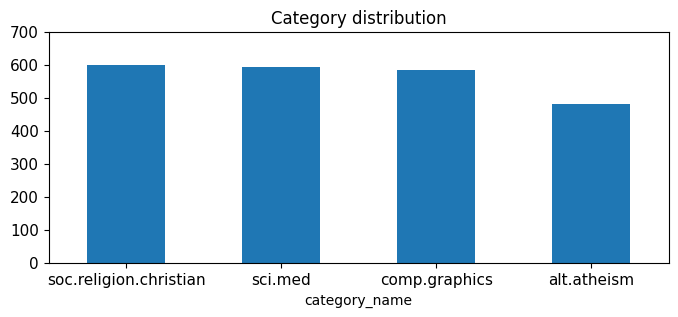

In [11]:
# plot barchart for X
def _hundreds(num : int) -> int:
    drift = 2 if num % 100 > 80 else 1
    return (num // 100 + drift ) * 100


X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0,_hundreds(max(X.category_name.value_counts()))],        
                                    rot = 0, fontsize = 11, figsize = (8,3))


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

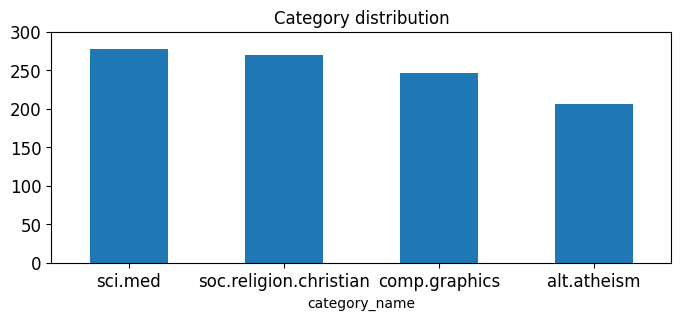

In [12]:
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0,_hundreds(max(X_sample.category_name.value_counts()))],
                                           rot = 0, fontsize = 12, figsize = (8,3))


### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

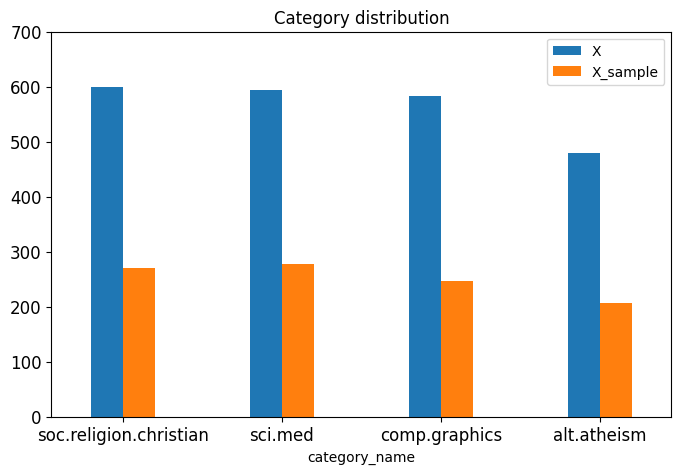

In [13]:
concat_X = pd.concat([
    X['category_name'].value_counts(),
    X_sample['category_name'].value_counts()
], axis=1, keys=['X', 'X_sample'])
all_counts = []
for i in range(len(concat_X.columns)):
    all_counts.extend(concat_X.iloc[:,i].tolist())

concat_X.plot(
    kind='bar',
    title='Category distribution',
    ylim = [0,_hundreds(max(all_counts))],
    rot = 0, fontsize = 12, figsize = (8,5),
    width = 0.4
);

### **>>> Exercise 9 (Watch Video):**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [14]:
# ========= not exercise code =========
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
# print(X_counts[0])
analyze = count_vect.build_analyzer() 
analyze("I am craving for a hawaiian pizza right now")
# ================ end ================

X_first_doc = X.text.loc[0] # get the text of the first document
print(analyze(X_first_doc))

['from', 'sd345', 'city', 'ac', 'uk', 'michael', 'collier', 'subject', 'converting', 'images', 'to', 'hp', 'laserjet', 'iii', 'nntp', 'posting', 'host', 'hampton', 'organization', 'the', 'city', 'university', 'lines', '14', 'does', 'anyone', 'know', 'of', 'good', 'way', 'standard', 'pc', 'application', 'pd', 'utility', 'to', 'convert', 'tif', 'img', 'tga', 'files', 'into', 'laserjet', 'iii', 'format', 'we', 'would', 'also', 'like', 'to', 'do', 'the', 'same', 'converting', 'to', 'hpgl', 'hp', 'plotter', 'files', 'please', 'email', 'any', 'response', 'is', 'this', 'the', 'correct', 'group', 'thanks', 'in', 'advance', 'michael', 'michael', 'collier', 'programmer', 'the', 'computer', 'unit', 'email', 'collier', 'uk', 'ac', 'city', 'the', 'city', 'university', 'tel', '071', '477', '8000', 'x3769', 'london', 'fax', '071', '477', '8565', 'ec1v', '0hb']


### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [15]:
vect_data = X_counts[4, 0:100].toarray().squeeze()
indices = np.nonzero(vect_data)
count_vect.get_feature_names_out()[indices][1]
# >> "01"

'01'

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with **FREQUENCY** of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

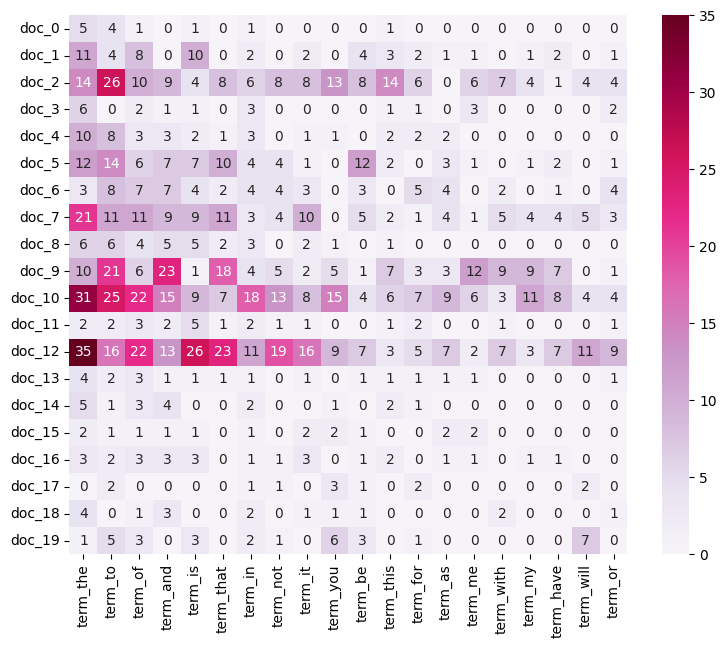

In [16]:

# create a 0:20 vacabulary dictionary
X_sub = X_counts[0:20, :]

# get all feature names
feature_names = count_vect.get_feature_names_out()

# count frequency of each word in the sub-matrix
word_freq = np.asarray(X_sub.sum(axis=0)).squeeze() # can use .ravel() also on here

# create a dataframe for vocabulary and their frequency
vocab_freq_df = pd.DataFrame({
    'term': feature_names,
    'freq': word_freq
},columns=['term','freq'],
index=[i for i in range(len(feature_names))])

# sort by frequency
vocab_freq_df = vocab_freq_df.sort_values(by='freq', ascending=False)
# get top 20 frequent words
top20 = vocab_freq_df.head(20)

# get the term indices
term_indices = [np.where(feature_names == t)[0][0] for t in top20['term']]

# first twenty features only
plot_x = ["term_"+str(i) for i in top20['term'].tolist()]
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_sub[:, term_indices].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, #vmax=max(plot_z.ravel()), # flatten plot_z to 1D array, and get the max value
                 annot=True)

### >>> **Exercise 12 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [17]:
# ========= not exercise code =========
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
# ================ end ================

df_plot = pd.DataFrame({
    "term": count_vect.get_feature_names_out()[:300],
    "frequency": term_frequencies[:300]
})

fig = px.bar(
    df_plot,
    x="term",
    y="frequency",
    title="Word Frequency Distribution (Top 300 Terms)",
    labels={"term": "Term", "frequency": "Count"},
    color="frequency",
    # color_continuous_scale="Viridis"  # "Plasma", "Blues", "Magma"
)

fig.update_layout(
    xaxis_tickangle=-90,
    width=1400,
    height=600,
    showlegend=False
)

fig.show()

### >>> **Exercise 13 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [18]:
df_plot = pd.DataFrame({
    "term": count_vect.get_feature_names_out()[:300],
    "frequency": term_frequencies[:300]
})
df_top50 = df_plot.sort_values(by='frequency', ascending=False).head(50) # get top 50 terms
df_plot = df_plot[df_plot["term"].isin(df_top50["term"])]# filter to only top 50 terms(although it's a bit redundant)
fig = px.bar(
    df_plot,
    x="term",
    y="frequency",
    title="Word Frequency Distribution (Top 300 Terms)",
    labels={"term": "Term", "frequency": "Count"},
    color="frequency",
    # color_continuous_scale="Viridis"  # "Plasma", "Blues", "Magma"
)

fig.update_layout(
    xaxis_tickangle=-45,
    width=1000,
    height=600,
    showlegend=False
)

fig.show()

### >>> **Exercise 14 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [19]:
df_plot = pd.DataFrame({
    "term": count_vect.get_feature_names_out()[:300],
    "frequency": term_frequencies[:300]
})
df_top50 = df_plot.sort_values(by='frequency', ascending=False).head(50) # get top 50 terms

fig = px.bar(
    df_top50,
    x="term",
    y="frequency",
    title="Word Frequency Distribution (Top 300 Terms)",
    labels={"term": "Term", "frequency": "Count"},
    color="frequency",
    # color_continuous_scale="Viridis"  # "Plasma", "Blues", "Magma"
)

fig.update_layout(
    xaxis_tickangle=-45,
    width=1000,
    height=600,
    showlegend=False
)

fig.show()

### >>> **Exercise 15 (take home):** 
You can copy the code from the previous exercise and change the 'term_frequencies' variable for the 'term_frequencies_log', comment about the differences that you observe and talk about other possible insights that we can get from a log distribution.

In [20]:
# ========= not exercise code =========
term_frequencies_log = [math.log(i) for i in term_frequencies]
# ================ end ================

df_plot = pd.DataFrame({
    "term": count_vect.get_feature_names_out()[:300],
    "frequency": term_frequencies[:300],
    "log_frequency": term_frequencies_log[:300]
})
df_top50 = df_plot.sort_values(by='frequency', ascending=False).head(50) # get top 50 terms

fig = px.bar(
    df_top50,
    x="term",
    y="log_frequency",
    title="Word Frequency Distribution (Top 300 Terms)",
    labels={"term": "Term", "log_frequency": "Count"},
    color="log_frequency",
    # color_continuous_scale="Viridis"  # "Plasma", "Blues", "Magma"
)

fig.update_layout(
    xaxis_tickangle=-45,
    width=1000,
    height=600,
    showlegend=False
)

fig.show()  
# The log scale adjusts extreme values on charts, making differences easier to see.
# in simple terms, taking the log of the frequencies helps to compress large differences and makes rare words more visible.
# this allows us to better understand the overall word distribution, especially the long tail.
# (by Chatgpt to polish the manuscript. I could't understand what I wrote...)

# Phase 2

In [21]:
### Begin Assignment Here